# 5.1 Infiltration

Infiltration is a complex process influenced by multiple factors such as soil characteristics, land use, slope, vegetation cover, precipitation intensity, and human activities. The soil's permeability, texture, structure, and moisture content significantly impact infiltration rates. Coarse soils with higher permeability tend to have higher infiltration rates compared to fine-textured soils like clay.

## Importance and Roles:

Infiltration plays important roles in:

1. Water Availability: Infiltration governs the replenishment of groundwater resources, contributing to the sustained flow of streams and rivers during dry periods. A high infiltration rate allows water to percolate deeper into the soil, recharging aquifers and maintaining base flow in rivers.
2. Flood Mitigation: Adequate infiltration helps prevent surface runoff, reducing the risk of flooding by allowing water to infiltrate into the soil, thus delaying the onset of overland flow.
3. Water Quality: Infiltration acts as a natural filter, removing pollutants and impurities as water percolates through the soil. However, excessive or improper land use can compromise this filtration capacity, leading to contamination of surface water resources.

## Factors Affecting Infiltration Processes:

1. Land Use: Urbanization and deforestation can reduce natural infiltration rates due to increased impervious surfaces, resulting in enhanced surface runoff and decreased groundwater recharge.
2. Climate Change: Alterations in precipitation patterns and intensities due to climate change can affect infiltration rates, potentially leading to soil erosion and reduced water infiltration capacities.
3. Soil Management Practices: Techniques such as cover cropping, no-till agriculture, and contour plowing can help enhance soil structure and organic matter, promoting better infiltration.

Engineering Enhancement Strategies:

1. Green Infrastructure: Implementing green spaces, permeable pavements, and rain gardens in urban areas can enhance infiltration rates and decrease surface runoff.
2. Soil Conservation: Practices like terracing, contour farming, and agroforestry aid in reducing soil erosion, enhancing soil structure, and preserving natural infiltration capacities.
3. Education and Regulation: Public awareness campaigns and policies regarding responsible land use and water management can aid in preserving natural infiltration processes.

## Infiltration Models

Examination of various process models at

[Cleveland, T. G. (2020) *Surface Water Hydrology Notes (Infiltration) to accompany CE-5361*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2020/lesson07/Lesson07.pdf)

## Infiltration Process Description

Water that soaks into the ground and thereby enters the soil structure is considered removed from the runoff process at the time it enters the soil. The process by which this occurs is called infiltration. This process is the first step in a lengthy and vital process, the interaction of soil, water, air, and plant life.

The soil matrix in its simplest form consists of particles of soil (minerals) loosely packed together in such a way that there are void spaces (pores). The pores are filled by either air or by water. If the voids are completely filled with water, the soil is said to be saturated. If a volume of saturated soil overlies something that does not block flow, some of the water contained in it will drain away, and some will remain trapped in the pore spaces in the soil by capillary forces. The size of the pore spaces in natural soils is such that capillary forces are important in the movement of water through them. The amount of water that drains through is called gravitational water, and is particular to the soil, as is the amount retained. The water retained balances forces between gravity and capillarity, and maintains equilibrium.

Plants have roots that penetrate the upper soil layers, and remove water held there by cap-illarity. The upper layers of soil are thereby unbalanced, having capillary potential available to take up water. When rain falls on such a soil, there are initially two forces driving water into the soil- gravity and capillarity. If sufficient rain is available, the upper layers of the soil will become saturated, and the water will proceed downward. Due to the dual forces of capillarity and gravity, the initial rate of uptake of water may be quite high. As the capillary force is satisfied, gravity becomes the only force and the rate of uptake reaches an equilibrium value, as gravitational water drains through the soil.

The progress of this phenomenon can be shown graphically [sketch on board](http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson08/InfiltrationProcess.pdf). Initially, the rate of infiltration is quite high, and it decays to a steady-state value as a first-order function of time.

Mathematically, there have been a number of relationships proposed to represent this progress. Collectively these equations represent different loss models. They are all attempts to explain a complex phenomenon currently beyond our understanding at any but the smallest scales. What follows are the set of more common models in use.

### Proportional Loss Model

The loss is some proportion of the incoming rainfall.  Somewhat similar in mindset to the rational method, but every rainfall pulse produces runoff (albeit possibly quite small).  It does produce good mass balance with observations.

### Horton’s Model
Hortons equation is one of the simpler, and is presented here:

$$q(t)=f_c+(f_a-f_c)e^{-kt}$$

where $q(t)$ = the infiltration rate at time $t$, in length/time;<br> $f_c$ = the equilibrium infiltration rate, in length/time; <br> $f_o$ = the initial infiltration rate, in length/time; <br>$k$ = a decay constant, particular to the soil, in reciprical time;<br> $t$ = time.

The integral of Hortons equation with time is the volume of rainfall that infiltrates during
an event.

$$I(t)= \int_{0}^{t} q(\tau) d\tau $$

where I(t) is cumulative infiltration at time t, a depth.
The parameters in Hortons equation can be determined for any give soil by infiltrometer tests. The parameters in Hortons equation can be determined for any give soil by infiltrometer tests. A script to generate a graph of Hortons equation for $f_c = 0.53~in/hr$, $f_o = 3~in/hr$, and $k = 4.182~hr^{−1}$ is listed below. 

In the script below the input precipitation is set to slightly exceed the initial rate so that runoff is generated immediately, its mostly to show a runoff plot but is ancillary to the example.

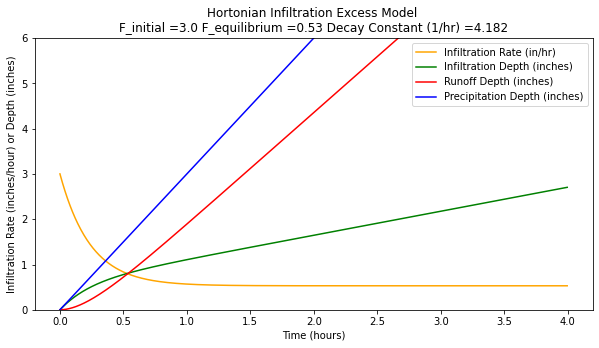

In [37]:
## Hortonian Infiltration Excess Model
import math
howmany = 1000
k = 4.182 # watershed infiltration excess decay constant
f0 = 3.0 # initial infiltration rate
fC = 0.53 # asymptotic infiltration rate
#
pRate = 3.0001 # some constant rate in excess of fC, for plotting only!
Tend = 5.0 # rainfall duration

def qfunc(f0,fC,kay,time):
    qfunc = fC+(f0 - fC)*math.exp(-time*kay)
    return(qfunc)

def peein(rate,time,tend): # a simple hyetograph model
    if time >= tend:
        peein=0.0
    else:
        peein=rate
    return(peein)

qnow = [0 for i in range(howmany)]
CumQnow = [0 for i in range(howmany)]
CumPnow = [0 for i in range(howmany)]
PXSnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.004 # time step value
# time zero values
qnow[0]=qfunc(f0,fC,k,time[0])
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=qfunc(f0,fC,k,time[itime])
    CumQnow[itime]=qnow[itime]*deltat + CumQnow[itime-1]
 #   rnow[itime]=alpha*qfunc(peein,time[itime],alpha)
    PXSnow[itime]=peein(pRate,time[itime],Tend)*time[itime]-CumQnow[itime]
    CumPnow[itime]=peein(pRate,time[itime],Tend)*time[itime]

import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
#matplotlib.pyplot.plot(pnow, pnow, color ='blue') 
matplotlib.pyplot.plot(time, qnow, color ='orange') 
matplotlib.pyplot.plot(time, CumQnow, color ='green') 
matplotlib.pyplot.plot(time, PXSnow, color ='red') 
matplotlib.pyplot.plot(time, CumPnow, color ='blue') 
matplotlib.pyplot.ylim([0,2*max(qnow)])
matplotlib.pyplot.xlabel("Time (hours)") 
matplotlib.pyplot.ylabel("Infiltration Rate (inches/hour) or Depth (inches)") 
matplotlib.pyplot.title("Hortonian Infiltration Excess Model \n"+"F_initial ="+str(f0)+
                        " F_equilibrium ="+str(fC)+" Decay Constant (1/hr) ="+str(k) )
matplotlib.pyplot.legend(["Infiltration Rate (in/hr)","Infiltration Depth (inches)","Runoff Depth (inches)","Precipitation Depth (inches)"])
matplotlib.pyplot.show() 

When rain begins, infiltration also begins, and is the initial value (denoted fo in Hortons equation) is quite high (in this case, $3.0~in/hr$). At that time, infiltration rate usually exceeds the intensity of rainfall. As the infiltration rate drops, it at some point intersects with the rate of rainfall. After that point, rainfall rate will exceed infiltration rate. With no runoff, water would begin to pond on the soil surface. The time from beginning of rain until that point is reached is called the time to ponding. After some time, the infiltration rate has dropped until it approaches an equilibrium value, represented by $f_c$ (in this case, $0.53~in/hr$). After that time, gravity alone is the force driving the infiltration process.

If the rainfall rate is less that the initial rate, and the storm duration is a bit shorter different results appear as below when the storm is shortened to 2 hours, and the rainfall rate is 2.0

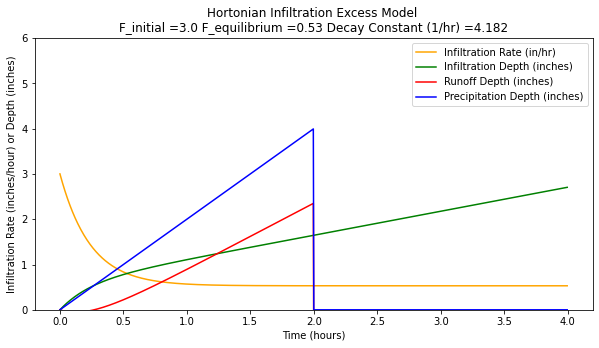

In [38]:
## Hortonian Infiltration Excess Model
import math
howmany = 1000
k = 4.182 # watershed infiltration excess decay constant
f0 = 3.0 # initial infiltration rate
fC = 0.53 # asymptotic infiltration rate
#
pRate = 2.0001 # some constant rate in excess of fC, for plotting only!
Tend = 2.0 # rainfall duration

def qfunc(f0,fC,kay,time):
    qfunc = fC+(f0 - fC)*math.exp(-time*kay)
    return(qfunc)

def peein(rate,time,tend): # a simple hyetograph model
    if time >= tend:
        peein=0.0
    else:
        peein=rate
    return(peein)

qnow = [0 for i in range(howmany)]
CumQnow = [0 for i in range(howmany)]
CumPnow = [0 for i in range(howmany)]
PXSnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.004 # time step value
# time zero values
qnow[0]=qfunc(f0,fC,k,time[0])
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=qfunc(f0,fC,k,time[itime])
    CumQnow[itime]=qnow[itime]*deltat + CumQnow[itime-1]
 #   rnow[itime]=alpha*qfunc(peein,time[itime],alpha)
    PXSnow[itime]=peein(pRate,time[itime],Tend)*time[itime]-CumQnow[itime]
    CumPnow[itime]=peein(pRate,time[itime],Tend)*time[itime]

import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
#matplotlib.pyplot.plot(pnow, pnow, color ='blue') 
matplotlib.pyplot.plot(time, qnow, color ='orange') 
matplotlib.pyplot.plot(time, CumQnow, color ='green') 
matplotlib.pyplot.plot(time, PXSnow, color ='red') 
matplotlib.pyplot.plot(time, CumPnow, color ='blue') 
matplotlib.pyplot.ylim([0,2*max(qnow)])
matplotlib.pyplot.xlabel("Time (hours)") 
matplotlib.pyplot.ylabel("Infiltration Rate (inches/hour) or Depth (inches)") 
matplotlib.pyplot.title("Hortonian Infiltration Excess Model \n"+"F_initial ="+str(f0)+
                        " F_equilibrium ="+str(fC)+" Decay Constant (1/hr) ="+str(k) )
matplotlib.pyplot.legend(["Infiltration Rate (in/hr)","Infiltration Depth (inches)","Runoff Depth (inches)","Precipitation Depth (inches)"])
matplotlib.pyplot.show() 

### Phi-Index Model

![](PhiIndex.png)

### Green-Ampt Model

The Green-Ampt model is a simplified soil-physics model that is reasonably defendible in most hydrologic engineering situations.

![](GApart1.png)

![](GApart2.png)

![](GApart3.png)

![](GApart4.png)

![](GApart5.png)

A detailed explaination with example calculations is located at [Cleveland, T. G. (2008) *Surface Water Hydrology Notes (Green-Ampt Infiltration) to accompany CE-5361*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson08/Green-Ampt.pdf)


### Initial Abstraction - Constant Loss 

For this watershed-loss model, a watershed is conceptualized to have the capacity to store or abstract an absolute depth of rainfall at and near the beginning of a storm. Depths of total rainfall less than this initial abstraction do not produce runoff. The watershed also is conceptualized to have the capacity to remove rainfall at a constant rate (loss) after the initial abstraction is satisfied. Additional rainfall inputs after the initial abstraction is satisfied contribute to runoff if the rainfall rate (intensity) is larger than the constant loss.

Examination of various process models at

[Cleveland, T. G. (2020) *Surface Water Hydrology Notes (Infiltration) to accompany CE-5361*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2020/lesson07/Lesson07.pdf)

## HEC-HMS Loss Models

>A sub**basin** element conceptually represents infiltration, surface runoff, and
subsurface processes interacting together, the actual infiltration calculations are
performed by a loss method contained within the subbasin. A total of twelve different
loss methods are provided. Some of the methods are designed primarily for
simulating events while others are intended for continuous simulation. All of the
methods conserve mass. That is, the sum of infiltration and precipitation left on the
surface will always be equal to total incoming precipitation.

>The inputs for each loss method are presented on a separate Component Editor
from the subbasin element editor. The "Loss" editor is always shown next to the
"Subbasin" editor. If the kinematic wave transform method is selected, there may be
two loss editors, one for each runoff plane. The information shown on the loss editor
will depend on which method is currently selected

A fully provisioned Windows Implementation of HEC-HMS is located at:

- server_name: **kittyinthewindow.ddns.net**
- user_name: **texas-skew**
- passwd: **peakfq73$hare**

Users must access using Remote Desktop Protocol (Built into Windows, Apple Store has a free Mac application).

- Use the Hardin Creek Project to explore different loss models.

Recomended Loss models for semester project are CN model or Green-Ampt.  These are easiest to parameterize from available data sources for the project and should be adequate for the problem statement.

## References

1. [Cleveland, T. G. (2020) *Surface Water Hydrology Notes (Infiltration) to accompany CE-5361*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2020/lesson07/Lesson07.pdf)
2. [Green-Ampt Spreadsheet (Excel)](http://54.243.252.9/ce-3354-webroot/1-Lectures-2020/lesson07/ce5361_green_ampt.xlsx) Right-Click "Save As..."
3. Chow, V. T., 1964. Handbook of Applied Hydrology. McGraw Hill, New York. Sec. 14., 2pp.
4. Fang, X., Asquith, W.H., Garcia , C.A., Cleveland, T.G., Thompson, D.B., Malla, R. 2004 Literature Review on Time Parameters for Hydrographs. Project Report 4696-1. Texas Department of Transportation.
5. USDA National Engineering Handbook, Chapters 4,5, and 10.
6. Wurbs and James, 2002. Water Resources Engineering. Prentice-Hall, New Jersey. Pp 462-483.
7. Polubarinova-Kochina, 1962. Theory of Groundwater Movement, (Translated from Russian by R. De Wiest), Princeton University Press, New Jersey.
8. [An Initial-Abstraction, Constant-Loss Model for Unit Hydrograph Modeling for Applicable Watersheds in Texas](http://54.243.252.9/ce-3354-webroot/3-Readings/USGS-Texas-IaCl/sir2007-5243.pdf)
9. [Cleveland, T. G. (2020) *Surface Water Hydrology Notes (Infiltration) to accompany CE-5361*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2020/lesson07/Lesson07.pdf)